## Imports

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from thefuzz import process

from lib.sb_utils import save_file


## Read Data

In [265]:
credit_data = pd.read_csv('../raw_data/credit_data.csv')

In [266]:
# Overview of data
print(credit_data.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [267]:
# Entry and feature count
credit_data.shape

(32581, 12)

In [268]:
# Missing values count
credit_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Impute missing data as needed

In [269]:
# Analyze person_emp_length
credit_data[credit_data['person_emp_length'].isna()].head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
433,22,18000,OWN,NaN,VENTURE,B,2000,11.49,0,0.11,N,3
443,21,18000,OWN,NaN,EDUCATION,B,5000,11.11,1,0.28,N,2
529,24,19200,MORTGAGE,NaN,HOMEIMPROVEMENT,A,7000,5.99,1,0.36,N,4
567,21,19253,MORTGAGE,NaN,DEBTCONSOLIDATION,A,6250,6.17,1,0.32,N,3
691,24,20856,OWN,NaN,VENTURE,B,10000,10.59,0,0.48,N,4


In [270]:
# Replace missing data from person_emp_length with the median
credit_data['person_emp_length'] = credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median())

In [271]:
# Analyze loan_int_rate
credit_data[credit_data['loan_int_rate'].isna()].head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
70,25,12000,OWN,0.0,MEDICAL,C,3000,NaN,1,0.25,N,3
71,22,56950,RENT,6.0,MEDICAL,A,28000,NaN,1,0.49,N,2
84,26,12000,OWN,0.0,DEBTCONSOLIDATION,A,2700,NaN,1,0.23,N,4
85,22,108000,RENT,6.0,EDUCATION,B,28000,NaN,1,0.26,N,4
87,24,69000,RENT,2.0,HOMEIMPROVEMENT,A,27600,NaN,1,0.40,N,2


In [272]:
# Replace missing data from loan_int_rate with the median
credit_data['loan_int_rate'] = credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].median())

In [273]:
# Check to see if all missing data is imputed
credit_data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Correct Data types

In [274]:
# Dtypes
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [275]:
# Select object features
credit_data.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


These features need to be changed for modeling.

### loan_grade

In [276]:
# loan_grade unique values
print("Before:", credit_data.loan_grade.unique())

# A will be 1, B will be 2, and so on
key = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
credit_data["loan_grade"] = credit_data["loan_grade"].map(key)

# loan_grade after transformation
print("After:", credit_data.loan_grade.unique())

Before: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
After: [4 2 3 1 5 6 7]


### cb_person_default_on_file

In [277]:
# cb_person_default_on_file unique values
print("Before:", credit_data.cb_person_default_on_file.unique())

# Yes will be 1, No will be 0
key = {"Y": 1, "N": 0}
credit_data["cb_person_default_on_file"] = credit_data["cb_person_default_on_file"].map(key)

# cb_person_default_on_file after transformation
print("After:", credit_data.cb_person_default_on_file.unique())

Before: ['Y' 'N']
After: [1 0]


### loan_intent

In [278]:
# loan_intent unique values
print("Before:", credit_data.loan_intent.unique())

# One hot encoding
credit_data = pd.get_dummies(credit_data, prefix_sep='_', dummy_na=False, columns=['loan_intent'], drop_first=True, dtype='int64')

# loan_intent after transformation
print("After:", credit_data.columns)

# loan_intent has been replaced with 5 new loan_intent_FEATURE columns with "DEBTCONSOLIDATION" left out to avoid multicollinearity

Before: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
After: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


### person_home_ownership

In [279]:
# person_home_ownership unique values
print("Before:", credit_data.person_home_ownership.unique())

# One hot encoding
credit_data = pd.get_dummies(credit_data, prefix_sep='_', dummy_na=False, columns=['person_home_ownership'], drop_first=True, dtype='int64')

# person_home_ownership after transformation
print("After:", credit_data.columns)

# person_home_ownership has been replaced with 3 new person_home_ownership_FEATURE columns with "MORTGAGE" left out to avoid multicollinearity

Before: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
After: Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')


In [280]:
# Check to see if all categories are preprocessed
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_grade                   32581 non-null  int64  
 4   loan_amnt                    32581 non-null  int64  
 5   loan_int_rate                32581 non-null  float64
 6   loan_status                  32581 non-null  int64  
 7   loan_percent_income          32581 non-null  float64
 8   cb_person_default_on_file    32581 non-null  int64  
 9   cb_person_cred_hist_length   32581 non-null  int64  
 10  loan_intent_EDUCATION        32581 non-null  int64  
 11  loan_intent_HOMEIMPROVEMENT  32581 non-null  int64  
 12  loan_intent_MEDICAL          32581 non-null  int64  
 13  loan_intent_PERS

# Feature Distribution

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.767994,4.087372,0.00,2.00,4.00,7.00,123.00
loan_grade,32581.0,2.218195,1.166336,1.00,1.00,2.00,3.00,7.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.009620,3.081611,5.42,8.49,10.99,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_default_on_file,32581.0,0.176330,0.381106,0.00,0.00,0.00,0.00,1.00
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


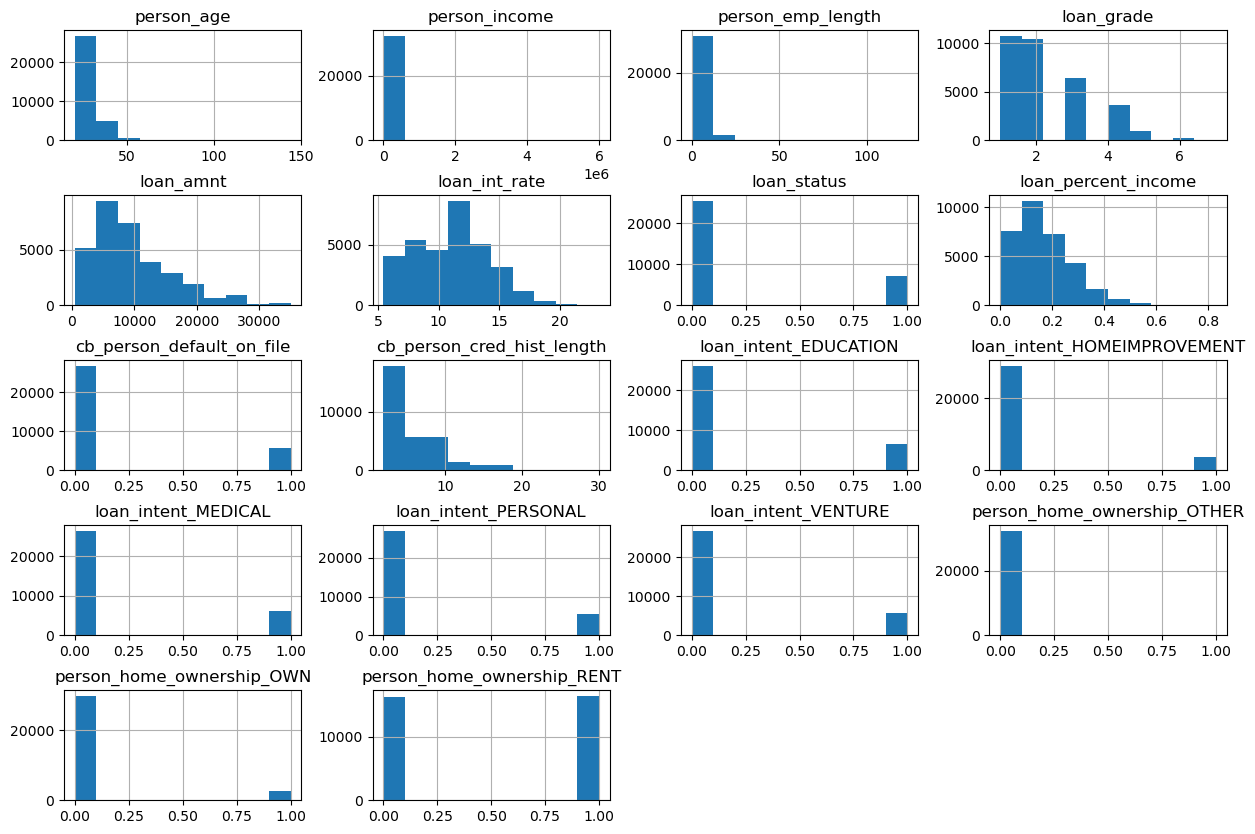

In [281]:
# Feature distribution visualization and statistics
credit_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
credit_data.describe().T

Need to investigate person_age as there are entries above 100. <br>
There are some outliers in person_income, but these are expected as income is generally right skewed. <br>
Similarly to person_age, person_emp_length needs to be investigated. <br>
Everything else seems to make sense. <br>

### person_age

In [282]:
# Look at entries with ages above 100
credit_data[credit_data['person_age'] > 100]

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
81,144,250000,4.0,3,4800,13.57,0,0.02,0,3,0,0,0,0,1,0,0,1
183,144,200000,4.0,2,6000,11.86,0,0.03,0,2,1,0,0,0,0,0,0,0
575,123,80004,2.0,2,20400,10.25,0,0.25,0,3,1,0,0,0,0,0,0,1
747,123,78000,7.0,2,20000,10.99,0,0.26,0,4,0,0,0,0,1,0,0,1
32297,144,6000000,12.0,3,5000,12.73,0,0.00,0,25,0,0,0,1,0,0,0,0


These don't seem to make sense and because there are only 5 entries we will just remove them

In [283]:
credit_data = credit_data[credit_data['person_age'] <= 100]

### person_emp_length

In [284]:
# Look at entries with emp_length above 80
credit_data[credit_data['person_emp_length'] > 50]

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,4,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0,1
210,21,192000,123.0,1,20000,6.54,0,0.10,0,4,0,0,0,0,1,0,0,0


These don't seem to make sense and because there are only 2 entries we will just remove them

In [285]:
credit_data = credit_data[credit_data['person_emp_length'] <= 50]

### person_income

In [286]:
# Look at entries with income above $1,000,000
credit_data[credit_data['person_income'] > 1000000]

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
17833,32,1200000,1.0,1,12000,7.51,0,0.01,0,8,0,0,0,0,1,0,0,0
29119,36,1200000,16.0,1,10000,6.54,0,0.01,0,11,0,0,1,0,0,0,1,0
29120,40,1200000,1.0,1,10000,10.99,0,0.01,0,16,0,0,1,0,0,0,0,0
30049,42,2039784,0.0,3,8450,12.29,0,0.00,1,15,0,0,0,0,1,0,0,1
31922,47,1362000,9.0,1,6600,7.74,0,0.00,0,17,0,0,0,0,1,0,0,0
31924,44,1440000,7.0,1,6400,7.40,0,0.00,0,15,0,0,0,0,0,0,0,0
32497,63,1782000,13.0,3,12025,14.27,0,0.01,0,30,1,0,0,0,0,0,0,1
32546,60,1900000,5.0,1,1500,10.99,0,0.00,0,21,0,0,0,1,0,0,0,0


These are considered outliers, but make sense in real life so they will be kept in the dataset.

,count,mean,std,min,25%,50%,75%,max
person_age,32574.0,27.718426,6.204987,20.00,23.00,26.00,30.00,94.00
person_income,32574.0,65878.480813,52531.938809,4000.00,38500.00,55000.00,79200.00,2039784.00
person_emp_length,32574.0,4.760576,3.981181,0.00,2.00,4.00,7.00,41.00
loan_grade,32574.0,2.218149,1.166382,1.00,1.00,2.00,3.00,7.00
loan_amnt,32574.0,9588.018051,6320.249598,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32574.0,11.009470,3.081664,5.42,8.49,10.99,13.11,23.22
loan_status,32574.0,0.218180,0.413017,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32574.0,0.170202,0.106755,0.00,0.09,0.15,0.23,0.83
cb_person_default_on_file,32574.0,0.176337,0.381112,0.00,0.00,0.00,0.00,1.00
cb_person_cred_hist_length,32574.0,5.804108,4.053873,2.00,3.00,4.00,8.00,30.00


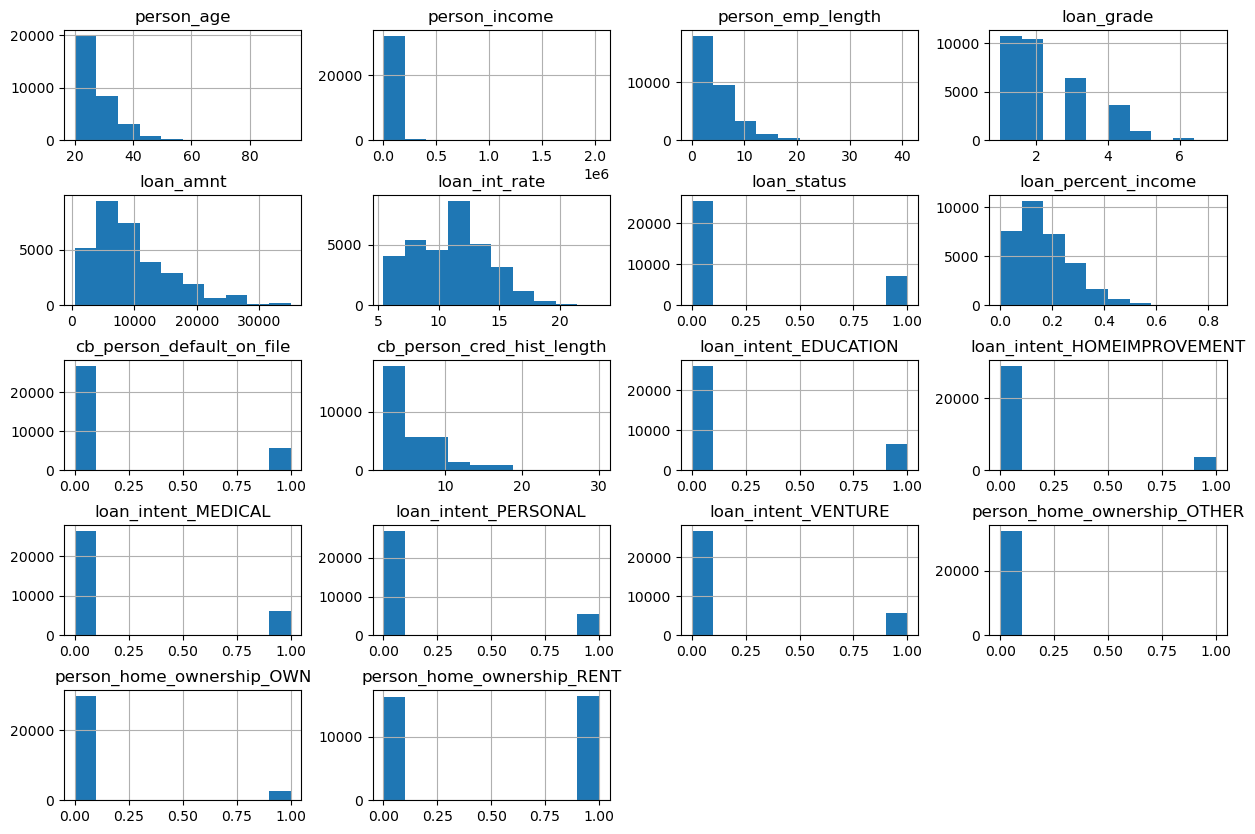

In [287]:
# After deleting misinputs we can look at new distributions
credit_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
credit_data.describe().T

These all look good!

## Save data

In [288]:
save_file(credit_data, 'credit_data_cleaned.csv', '../data')

Writing file.  "../data/credit_data_cleaned.csv"
